# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import SARIMAX

from functions import monthly, plot_acf_pacf, plot_preds

warnings.filterwarnings('ignore')

In [2]:
# Read in the data
unemp = pd.read_csv('materials/unemp_cleaned.csv')
unemp.index = pd.to_datetime(unemp['week_filed'])
unemp.drop('week_filed', axis=1, inplace=True)

construction_county = pd.read_csv('materials/construction_county_cleaned.csv')
construction_county.index = pd.to_datetime(construction_county['Unnamed: 0'])
construction_county.drop('Unnamed: 0', axis=1, inplace=True)

# Weekly Unemployment - Initial Claims (Statewide)

In [3]:
# Splitting data into pre- and post-Rita
pre_rita = unemp[:'2004'][['initial_claims']]
post_rita = unemp['2005':'2006'][['initial_claims']]

In [4]:
# Check for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(pre_rita['initial_claims']))

Test Statistic   -2.20134
p-value           0.20576
dtype: float64

In [5]:
# Find a value for d
for d in range(1, len(pre_rita)):
    if interpret_dftest(adfuller(pre_rita['initial_claims'].diff(d).dropna()))['p-value'] < 0.05:
        print(f'd={d} yields a stationary time series')
        break

d=1 yields a stationary time series


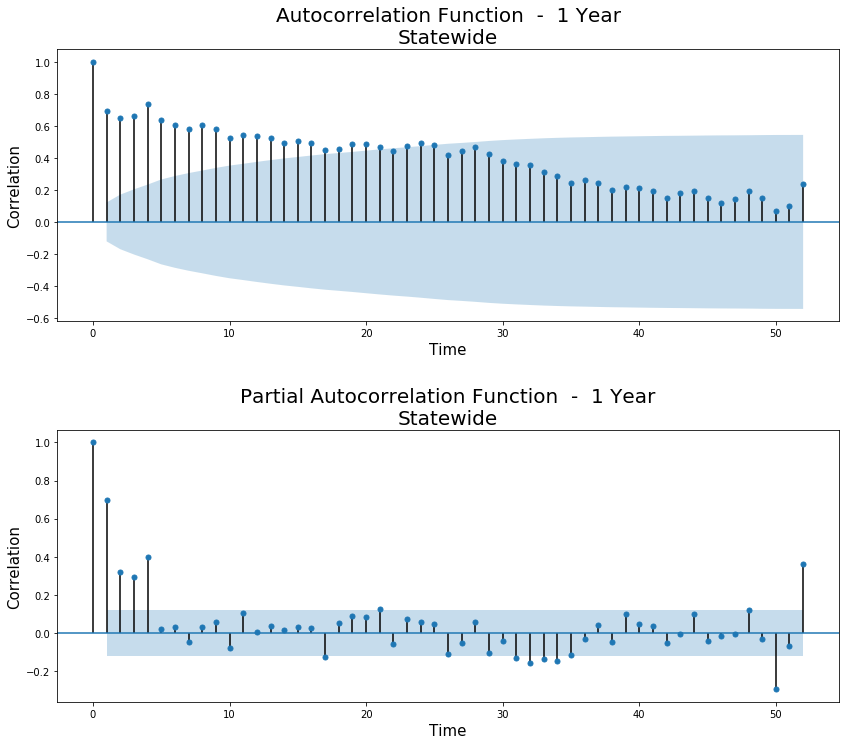

In [6]:
plot_acf_pacf(pre_rita, lags=52, time_range='1 Year', county_name='Statewide')

In [7]:
# Running a seasonal ARIMA model
sarima = SARIMAX(endog = pre_rita['initial_claims'],
                 order = (1, 1, 2),              
                 seasonal_order = (1, 1, 0, 52)) 
# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
preds = model.predict('2004-12','2007')

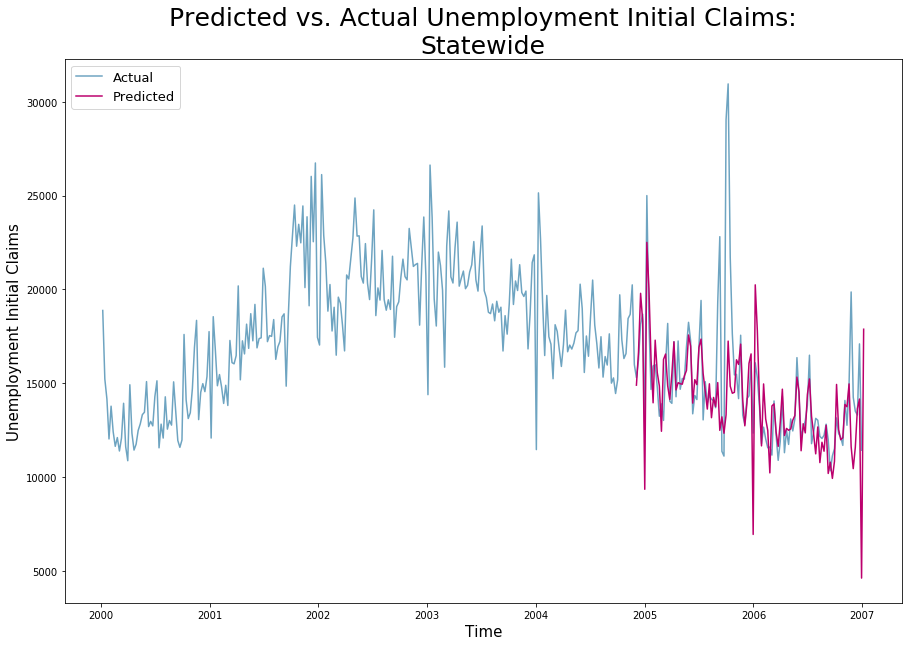

In [8]:
# Plotting data.
plot_preds(unemp[:'2006'][['initial_claims']], preds, 'Statewide', 'Unemployment Initial Claims');

# Construction Employment by County (Monthly)

In [9]:
jefferson = monthly(construction_county, 'jefferson')
orange = monthly(construction_county, 'orange')
hardin = monthly(construction_county, 'hardin')

## Jefferson County

In [10]:
prerita_jefferson = jefferson[:'2004-12']
postrita_jefferson = jefferson['2005':]

In [11]:
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(prerita_jefferson['employment']))

Test Statistic   -3.520567
p-value           0.007474
dtype: float64

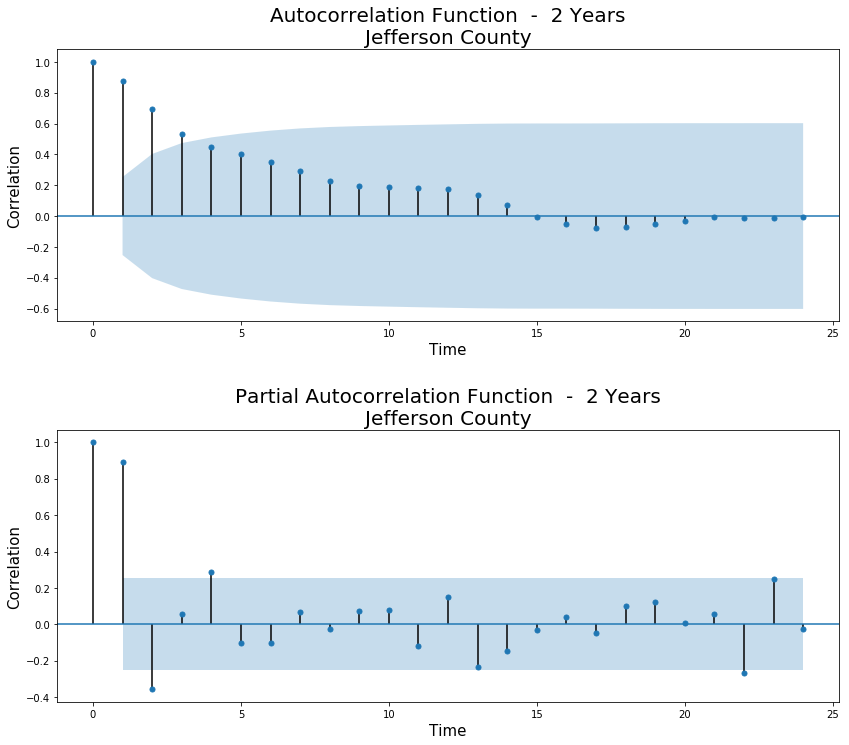

In [12]:
plot_acf_pacf(prerita_jefferson, 24, '2 Years', 'Jefferson County')

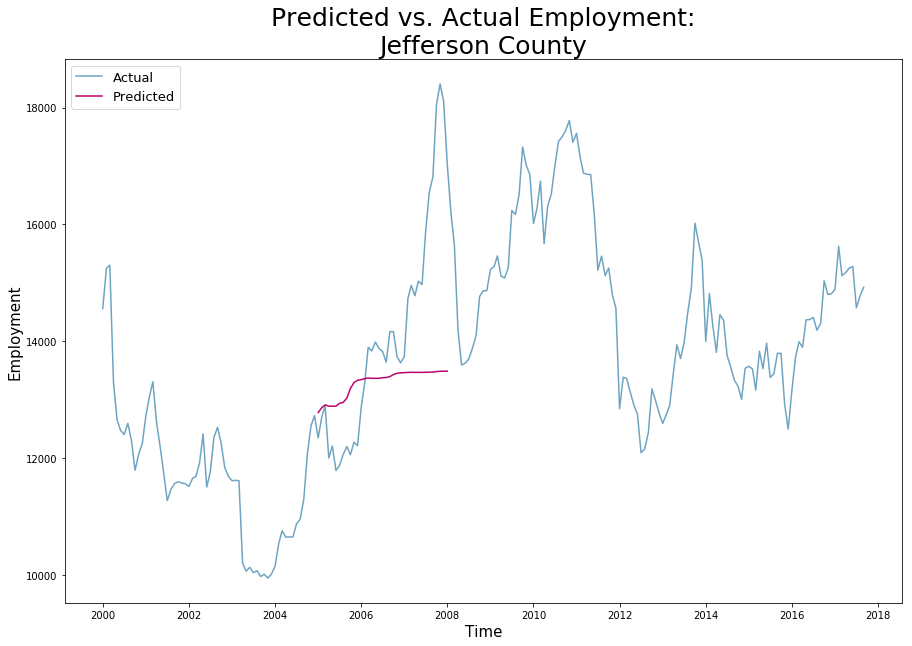

In [26]:
# Running an ARIMA model to predict post-Rita employment
model = SARIMAX(prerita_jefferson,
                order=(1,1,1),
               seasonal_order=(1, 0, 0, 12))
arima = model.fit()
preds_post_jefferson = arima.predict(start='2005', end='2008')

plot_preds(jefferson, preds_post_jefferson, 'Jefferson County', 'Employment')

## Orange County

In [27]:
prerita_orange = orange[:'2004-12']
postrita_orange = orange['2005':]

In [28]:
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(prerita_orange['employment']))

Test Statistic   -1.621821
p-value           0.471775
dtype: float64

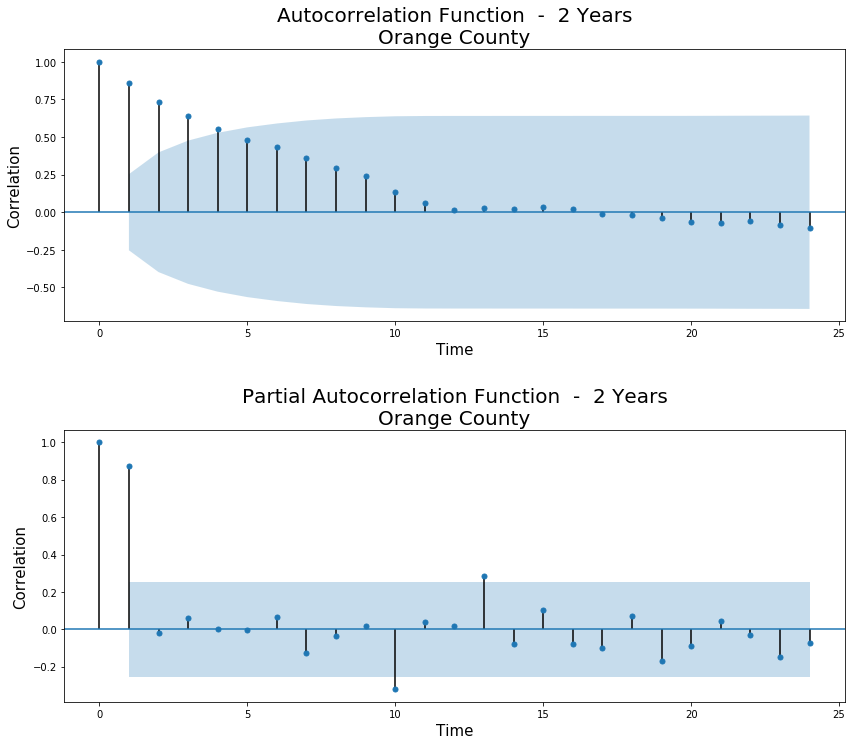

In [29]:
plot_acf_pacf(prerita_orange, 24, '2 Years', 'Orange County')

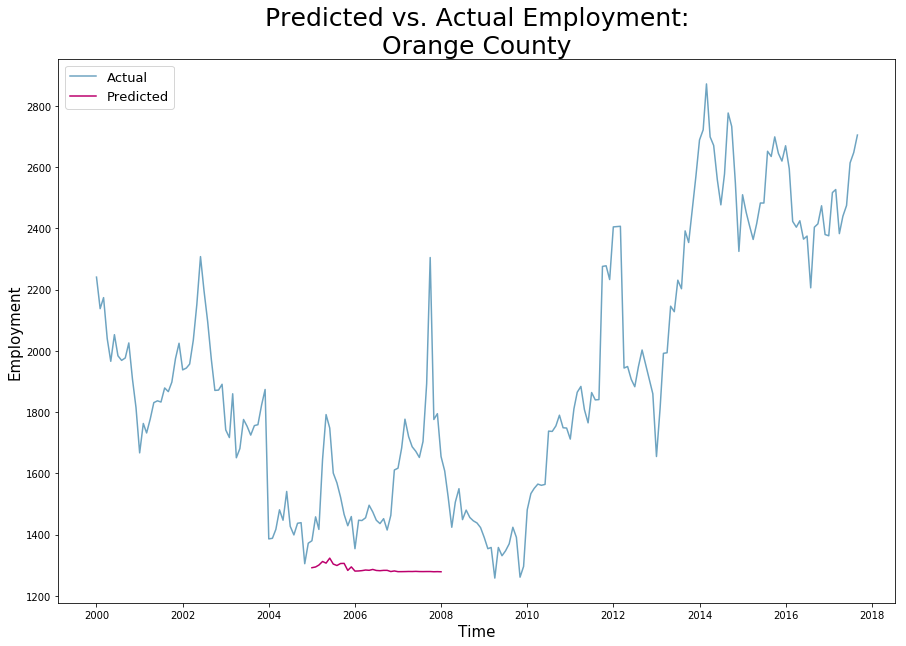

In [46]:
# Running an ARIMA model to predict post-Rita employment
model = SARIMAX(prerita_orange,
                order=(1,1,1),
               seasonal_order=(1, 0, 0, 12))
arima = model.fit()
preds_post_rita = arima.predict(start='2005', end='2008')

plot_preds(orange, preds_post_rita, 'Orange County', 'Employment')

## Hardin County

In [31]:
prerita_hardin = hardin[:'2004-12']
postrita_hardin = hardin['2005':]

In [32]:
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(prerita_hardin['employment']))

Test Statistic   -2.888190
p-value           0.046739
dtype: float64

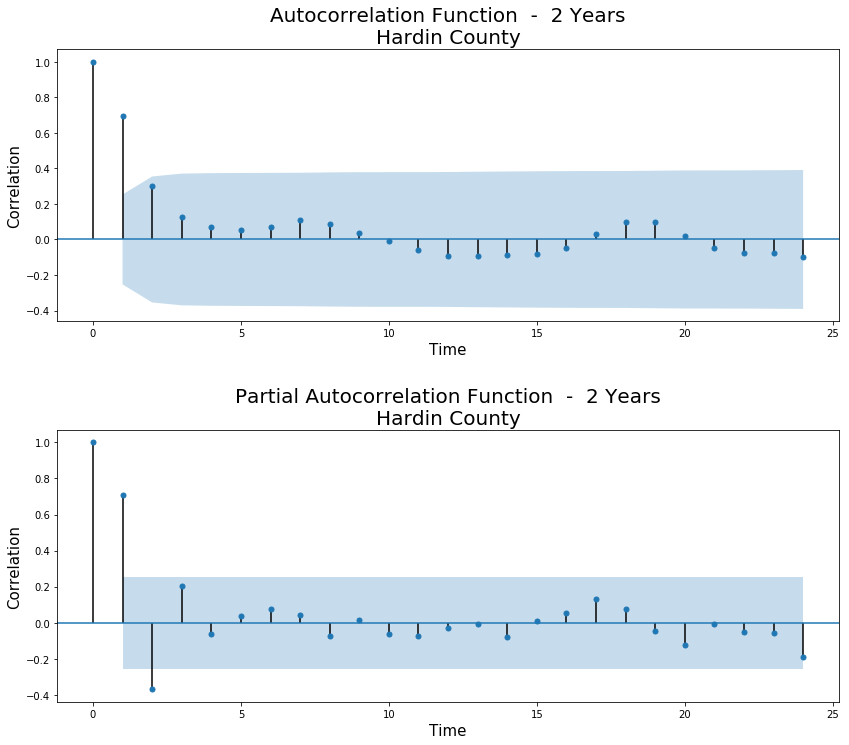

In [33]:
plot_acf_pacf(prerita_hardin, 24, '2 Years', 'Hardin County')

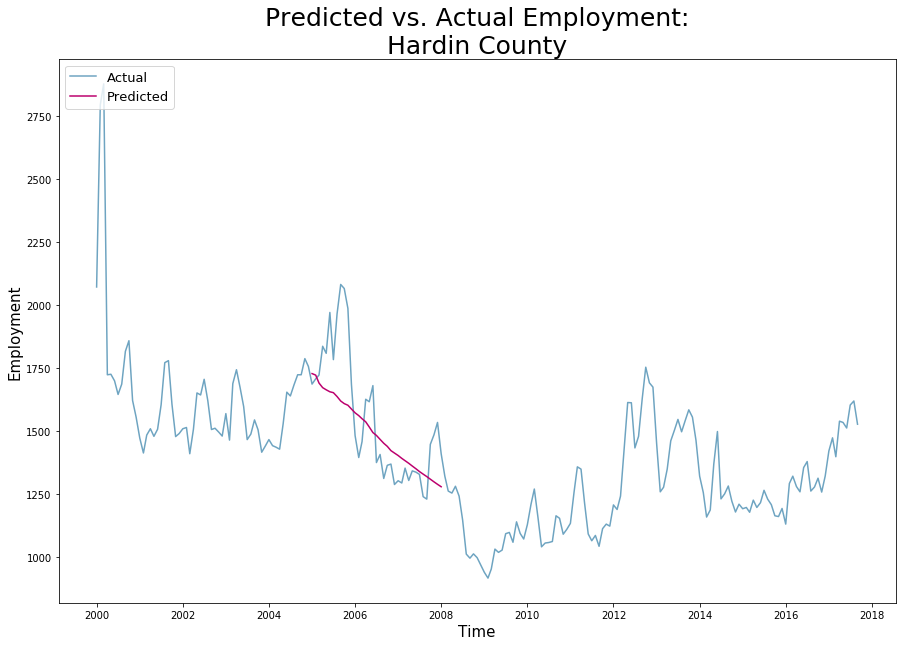

In [34]:
# Running an ARIMA model to predict post-Rita employment
model = SARIMAX(prerita_hardin,
                order=(1,0,1),
               seasonal_order=(1, 0, 0, 24))
arima = model.fit()
preds_post_hardin = arima.predict(start='2005', end='2008')

plot_preds(hardin, preds_post_hardin, 'Hardin County', 'Employment')